In [1]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots

import pandas as pd
import xarray as xr
import seaborn as sns
import warnings
import logging
import cartopy.crs as ccrs
# sns.set()

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist

In [2]:
settings_path = 'settings/obs_winter_30d.yaml'
fig_path = '/scratchx/mcarenso/tempest/figures/'
hdlr_obs_winter = handler.Handler(settings_path)
cs_obs_winter = casestudy.CaseStudy(hdlr_obs_winter, overwrite = False ,verbose = False)
gr_obs_winter = grid.Grid(cs_obs_winter, fast = True, overwrite= False, verbose_steps = False, verbose = False)

nbpd_fig1 = 20
nd = 4

jd_obs_winter = joint_distrib.JointDistribution(gr_obs_winter, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec",
                                            nbpd = nbpd_fig1,  nd=nd, overwrite = True, dist_mask = False)

settings_path = 'settings/obs_summer_30d.yaml'
fig_path = '/scratchx/mcarenso/tempest/figures/'
hdlr_obs_summer = handler.Handler(settings_path)
cs_obs_summer = casestudy.CaseStudy(hdlr_obs_summer, overwrite = False ,verbose = False)
gr_obs_summer = grid.Grid(cs_obs_summer, fast = True, overwrite= False, verbose_steps = False, verbose = False)
jd_obs_summer = joint_distrib.JointDistribution(gr_obs_summer, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec",
                                            nbpd = nbpd_fig1,  nd=nd, overwrite = True, dist_mask = False)

Data loaded from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Data loaded from /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/grid_attributes.pkl instead of computing


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


In [3]:
### WINTER + SUMMER###
settings_paths = [
  "settings/arpege_winter_30d.yaml", 
  "settings/arpege_summer_30d.yaml", 

  "settings/ifs_winter_30d.yaml" , 
  "settings/ifs_summer_30d.yaml" , 
  
  "settings/mpas_winter_30d.yaml", 
  "settings/mpas_summer_30d.yaml", 

  # "settings/obs_winter_30d.yaml",
  # "settings/obs_summer_30d.yaml",

  "settings/screamv1_winter_30d.yaml",
  "settings/screamv1_summer_30d.yaml", 
 
  "settings/sam_winter_30d.yaml", 
  "settings/sam_summer_30d.yaml", 

  "settings/um_winter_30d.yaml",
  "settings/um_summer_30d.yaml",

  "settings/xshield_winter_30d.yaml" , 
  "settings/fv3_summer_30d.yaml", 
  
  "settings/geos_winter_30d.yaml", 
  "settings/grist_winter_30d.yaml", 
  "settings/nicam_summer_30d.yaml", 
               ]

hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=nd, overwrite = True, dist_mask = False) for gr in grs]

Data loaded from /scratchx/mcarenso/tempest/ARPEGE_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/ARPEGE_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/IFS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/IFS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/MPAS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/MPAS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SCREAMv1_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SCREAMv1_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SAM_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SAM_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/UM_Winter_lowRes_Tropics/var

/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recom

In [4]:
# settings_path = 'settings/sam_4km_30min_30d.yaml'

### WINTER + SUMMER###
settings_paths = [
  "settings/obs_winter_30d.yaml",
  "settings/obs_summer_30d.yaml",
 
  "settings/sam_winter_30d.yaml", 
  "settings/sam_summer_30d.yaml", 

  "settings/xshield_winter_30d.yaml" , 
  "settings/fv3_summer_30d.yaml", 
               ]

hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
jds_map = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=5, overwrite = True, dist_mask = False) for gr in grs]

# lm = grs[0].get_landmask()
# ocean = lm.Landmask == 0
# ocean = ocean.values[:,:,np.newaxis]

Data loaded from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SAM_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SAM_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/XSHiELD_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/FV3_Summer_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratchx/mcarenso/tempest/SAM_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratch

/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


In [5]:
num_colors = 10
cmap = plt.get_cmap('hsv')
color_values = np.linspace(0, 0.9, num_colors)
model_colors = [cmap(value) for value in color_values]
model_colors[2] = (1.0, 1.0, 0.0, 1.0) ## yellow
model_colors[3] = (0.6, 1.0, 0.0, 1.0) ## greenish yellow

model_names = [
        "ARPEGE", 
        "IFS", 
        "MPAS", 
        "SCREAMv1",
        "SAM", 
        "UM", 
        "XSHiELD", "FV3",
        "GEOS", 
        "GRIST", 
        "NICAM"
        ]

In [6]:
from skimage import measure # pylance: disable=import-error 

def find_plot_contour(self, ax_show , N_branch=60, offset_low = 1, offset_up=1, color = 'k', lstyle = '--', model_name = None):
    Z = self.norm_density.T
    # -- Branches
    Z_contour = np.copy(Z)
    # Z_contour[18:, 18:] = 1 ## this number actually depends on nd and nbpd and the general shape of the Y 
    cont = measure.find_contours(Z_contour, 1)
    N = N_branch
    # fit
    popt_1, x_1, y_1, popt_2, x_2, y_2, func = self._fit_branches(cont,N, offset_low, offset_up)
    x_branch_2 = y_branch_1 = np.linspace(5,N_branch,N_branch)
    y_branch_2 = func(x_branch_2,*popt_2)
    x_branch_1 = func(y_branch_1,*popt_1)

    # show branches
    ax_show.plot(x_branch_1,y_branch_1, color = color, linestyle = lstyle, linewidth = 1.5, alpha = 0.9)
    ax_show.plot(x_branch_2,y_branch_2, color = color, linestyle = lstyle, linewidth = 1.5, alpha = 0.9, label  = model_name)

    return ax_show

import os
import pickle

def save_data(file_path, data):
    with open(file_path, 'wb') as f:
        pickle.dump(data, f)

def load_data(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

def check_and_create_directory(directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)

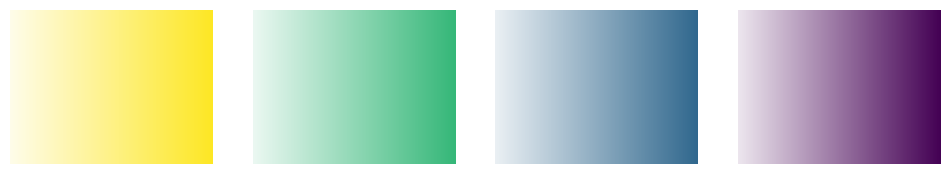

In [7]:
values = np.array([1, 2, 3, 4])
cmap = mpl.cm.viridis
norm = mpl.colors.BoundaryNorm(np.arange(0.5, 5), cmap.N)

# Sample colors from the viridis colormap
colors = cmap(norm(values))

cmaps = []
# Function to create a unicolor colormap with white/blank first, base color, then dark
def create_unicolor_colormap(base_color):
    # Create colors that start from white, transition to the base color, then to dark
    start = np.array([1, 1, 1, 1])  # white color
    end = np.array(base_color) # base color
    light_color = start + (end - start) * 0.1
    new_colors = [light_color * (1 - i) + end * i for i in np.linspace(0, 1, 256)]
    return mpl.colors.LinearSegmentedColormap.from_list("unicolor", new_colors)

for i, color in enumerate(colors[::-1]):
    new_cmap = create_unicolor_colormap(color)
    cmaps.append(new_cmap)

# Example usage: Visualizing the colormaps
fig, axs = plt.subplots(nrows=1, ncols=len(cmaps), figsize=(12, 2))
for ax, cmap in zip(axs, cmaps):
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    ax.imshow(gradient, aspect='auto', cmap=cmap)
    ax.axis('off')
plt.show()

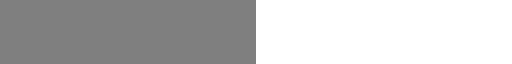

In [8]:
import matplotlib.colors as mcolors
colors = [(0.5, 0.5, 0.5, 1.0), (1.0, 1.0, 1.0, 1.0)]  # Grey and Transparent
cmap_grey = mcolors.ListedColormap(colors)

# Define a normalization that maps True to 1 and False to 0
norm_grey = mcolors.BoundaryNorm(boundaries=[0, 0.5, 1], ncolors=2)
cmap_grey

/home/mcarenso/code/tempest/tempest/joint_distrib.py:464: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/home/mcarenso/code/tempest/tempest/joint_distrib.py:464: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c
/home/mcarenso/code/tempest/tempest/joint_distrib.py:464: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/home/mcarenso/code/tempest/tempest/joint_distrib.py:464: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


Loading data_layers from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/SAM_Winter_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/SAM_Summer_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/XSHiELD_Winter_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/FV3_Summer_lowRes_Tropics/map_data_layers.pkl.


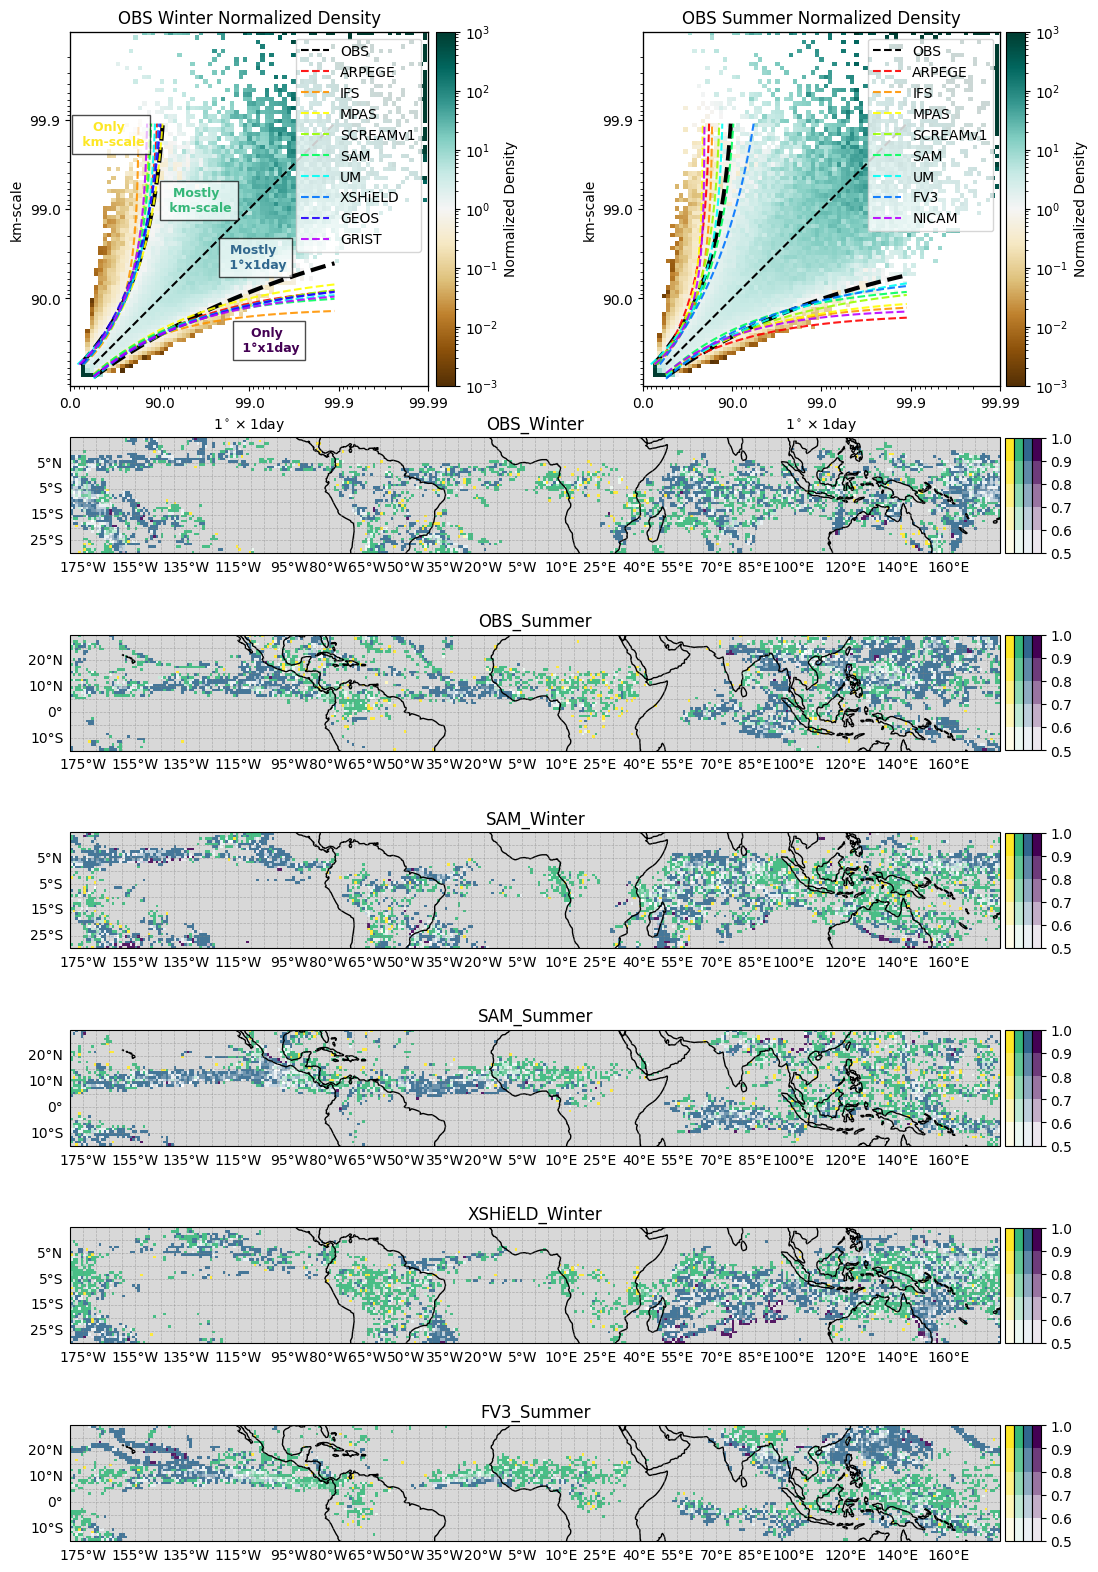

In [63]:
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LogNorm
from tempest.plots.plot2d import set_frame_invlog, show_joint_histogram

fig = plt.figure(figsize=(12, 20))
gs = GridSpec(nrows=7, ncols=2, figure=fig, height_ratios=[1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

ax1 = fig.add_subplot(gs[0, 0])  # First row, first column
ax2 = fig.add_subplot(gs[0, 1])  # First row, second column
# All maps in second column, spanning multiple rows
ax3 = fig.add_subplot(gs[1, :], projection=ccrs.PlateCarree(central_longitude=0))
ax4 = fig.add_subplot(gs[2, :], projection=ccrs.PlateCarree(central_longitude=0))
ax5 = fig.add_subplot(gs[3, :], projection=ccrs.PlateCarree(central_longitude=0))
ax6 = fig.add_subplot(gs[4, :], projection=ccrs.PlateCarree(central_longitude=0))
ax7 = fig.add_subplot(gs[5, :], projection=ccrs.PlateCarree(central_longitude=0))
ax8 = fig.add_subplot(gs[6, :], projection=ccrs.PlateCarree(central_longitude=0))

plt.subplots_adjust(hspace=0.1)  # Adjust vertical space
plt.subplots_adjust(wspace=0.6)  # Adjust horizontal space

# fontsize = 18
# fontname = 'DejaVu Sans'

## Winter multiple branches PN 
ax = ax1

obs_model_name, obs_season = jd_obs_winter.settings["MODEL"].split("_")[0], jd_obs_winter.settings["MODEL"].split("_")[1]
_, cb ,ax_show1 = jd_obs_winter.plot(mask = False, branch=[True, True] , fig = fig, ax = ax, N_branch=60, model_name = obs_model_name, offset_low = 1, offset_up=1, cbar = False)

for i, jdi in enumerate(jds):
    color = model_colors[i//2]
    model_name, season = jdi.settings["MODEL"].split("_")[0], jdi.settings["MODEL"].split("_")[1]
    if model_name == "GRIST" : color = model_colors[(i+1)//2]

    if model_name in model_names :
        if season =="Winter":
            ls = "--" if season == "Winter" else "-."
            _, find_plot_contour(jdi, ax_show1, N_branch=60, offset_low = 1, offset_up=1, color = color, lstyle=ls, model_name = model_name)

ax.set_xlabel(r"1$^\circ\times 1$day") #,  fontsize = fontsize, fontname=fontname)
ax.set_ylabel(r"km-scale") #,  fontsize = fontsize, fontname=fontname)
ax.set_title(label = obs_model_name+ " " + obs_season +" Normalized Density")#, fontsize = fontsize, fontname=fontname)
ax.tick_params(axis='x') #, labelsize=fontsize)
ax.tick_params(axis='y') #, labelsize=fontsize) 
ax_show1.legend()
# cb.ax.tick_params(labelsize=fontsize)  # Adjust font size of the tick labels
# cb.set_label('Normalized density')#, fontsize=fontsize)  # Adjust font size of the colorbar label

## Label boxs for winter only
labels = ['Only \n km-scale', 'Mostly \n km-scale', 'Mostly \n 1°x1day', 'Only \n 1°x1day']
# Colors sampled from viridis
values = np.array([1, 2, 3, 4])
cmap = mpl.cm.viridis
norm = mpl.colors.BoundaryNorm(np.arange(0.5, 5), cmap.N)
colors = cmap(norm(values))[::-1]
positions = [(9, 55), (29, 40), (42, 27), (45, 8)]  # Adjust positions of categories here

for label, color, position in zip(labels, colors, positions):
    text = ax_show1.text(position[0], position[1], label, fontsize=9, weight='bold', color=color, ha='center', bbox=dict(facecolor='white', alpha=0.7))
    # text.set_clip_on(False)
    text.set_zorder(2)
    # text.set_in_layout(True)
    # axs[1].annotate(label, position, fontsize=16, weight='bold', color=color, ha='center', bbox=dict(facecolor='white', alpha=0.7), zorder=1e5)

## Summer multiple branches PN 
ax = ax2

obs_model_name, obs_season = jd_obs_summer.settings["MODEL"].split("_")[0], jd_obs_summer.settings["MODEL"].split("_")[1]
_,cb,ax_show2 = jd_obs_summer.plot(mask = False, branch=[True, True] , fig = fig, ax = ax, N_branch=60, model_name = obs_model_name, offset_low = 1, offset_up=1, cbar = False)

for i, jdi in enumerate(jds):
    color = model_colors[i//2]
    model_name, season = jdi.settings["MODEL"].split("_")[0], jdi.settings["MODEL"].split("_")[1]
    # print(model_name, color)
    if model_name in model_names :
        if season =="Summer":
            ls = "--" if season == "Summer" else "-."
            _, find_plot_contour(jdi, ax_show2, N_branch=60, offset_low = 1, offset_up=1, color = color, lstyle=ls, model_name = model_name)

ax.set_xlabel(r"1$^\circ\times 1$day") #,  fontsize = fontsize, fontname=fontname)
ax.set_ylabel(r"km-scale") #,  fontsize = fontsize, fontname=fontname)
ax.set_title(label = obs_model_name+ " " + obs_season +" Normalized Density") #, fontsize = fontsize, fontname=fontname)
ax.tick_params(axis='x') #, labelsize=fontsize)
ax.tick_params(axis='y') #, labelsize=fontsize) 
ax_show2.legend()
# cb.ax.tick_params(labelsize=fontsize)  # Adjust font size of the tick labels
# cb.set_label('Normalized density') #, fontsize=fontsize)  # Adjust font size of the colorbar label

## Add cbs by hand for first rows
Z = jd_obs_summer.norm_density.T
scale = 'log'
vbds = (1e-3, 1e3)
cmap = plt.cm.BrBG
norm = LogNorm(vmin=vbds[0], vmax=vbds[1])  # Adjust vmin and vmax based on your data range

# Add the colorbar using a specific cax position
cax_position = [0.905, 0.703, 0.016, 0.177]  # [left, bottom, width, height]
cax = fig.add_axes(cax_position)
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
cb.set_label("Normalized Density")

cax_position = [0.43, 0.703, 0.016, 0.177]  # [left, bottom, width, height]
cax = fig.add_axes(cax_position)
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
cb.set_label("Normalized Density")

# Maps
overwrite = False ## datalayers

colormaps = cmaps
# Norms (assuming same boundaries for simplification)
norms = [mpl.colors.BoundaryNorm([0.5, 0.6, 0.7, 0.8, 0.9, 1], colormap.N) for colormap in colormaps]

#### This block makes mask_all 
rank_conv_min = 99
rank_acc_min = 99
mask_alls =[]

axs = [ax3, ax4, ax5, ax6, ax7, ax8]
for jd, ax in zip(jds_map, axs):
    jd.make_mask()
    mask_rank_conv = np.outer(jd.dist1.ranks >= 0, jd.dist2.ranks >= rank_conv_min)
    mask_rank_acc = np.outer(jd.dist1.ranks >= rank_acc_min , jd.dist2.ranks >= 0)
    mask_all = [
        np.logical_and(jd.mask_branch1_90, mask_rank_conv), 
        np.logical_and(jd.mask_coloc_c_90, mask_rank_conv), 
        np.logical_and(jd.mask_coloc_ac_90, mask_rank_acc), 
        np.logical_and(jd.mask_branch2_90, mask_rank_acc)
    ]

    jd_output = os.path.join(jd.settings["DIR_DATA_OUT"], jd.name)
    data_file = os.path.join(jd_output, 'map_data_layers.pkl')
    map_no_extremes_file = os.path.join(jd_output, 'map_no_extremes.pkl')

    if not overwrite and os.path.exists(data_file):
        print(f"Loading data_layers from {data_file}.")
        data_layers = load_data(data_file)
        mask_no_extremes = load_data(map_no_extremes_file)

    else:
        print(f"Computing data_layers and saving to {data_file}.")
        list_mask_yxt = []
        for mask_ranked, cmap in zip(mask_all, colormaps):
            mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask_ranked)
            list_mask_yxt.append(mask_yxt)
        mask_yxt_stacked = np.stack(list_mask_yxt)
        mask_no_extremes = np.sum(mask_yxt_stacked, axis = (0,-1))!=0
        mask_yxt_stacked = np.sum(mask_yxt_stacked, axis=-1) / np.sum(mask_yxt_stacked, axis=(0, -1)) ## axis 0 is class, last axis is days
        data_layers = [data for data in mask_yxt_stacked]
        for data in data_layers:
            data[data < 0.5] = np.nan

        save_data(data_file, data_layers)
        save_data(map_no_extremes_file, mask_no_extremes)


    lat_1d = jd.get_coord_values('lat')
    lon_1d = jd.get_coord_values('lon')
    lon_meshgrid, lat_meshgrid = np.meshgrid(lon_1d, lat_1d)

    width = 0.05
    height = 0.65
    bottom = 0.175
    left = 3.15
    left_incr = 0.05
    base_cax_positions = [[i, bottom, width, height] for i in [left, left+1*left_incr, left+2*left_incr, left+3*left_incr]]

    # Get the current axis position to adjust the cax positions accordingly
    pos = ax.get_position()
    cax_positions = []

    for base_pos in base_cax_positions:
        cax_positions.append([
            pos.x0 + base_pos[0] * pos.width,
            pos.y0 + base_pos[1] * pos.height,
            base_pos[2] * pos.width,
            base_pos[3] * pos.height
        ])

    im = ax.pcolormesh(lon_meshgrid, lat_meshgrid, mask_no_extremes, transform=ccrs.PlateCarree(), alpha=0.3, cmap=cmap_grey, norm=norm_grey)
    for i, (data, colormap, norm) in enumerate(zip(data_layers, colormaps, norms)):
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            im = ax.pcolormesh(lon_meshgrid, lat_meshgrid, data, transform=ccrs.PlateCarree(), alpha=0.9, cmap=colormap, norm=norm)

        cax = fig.add_axes(cax_positions[i])
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=colormap), cax=cax, ticks=[0.5, 0.6, 0.7, 0.8, 0.9, 1], spacing='uniform')
        if i != 3: 
            cb.set_ticks([]) 

    ax.set_title(jd.name[:-15])
    ax.coastlines('110m')
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator(range(-180, 181, 5))
    gl.ylocator = mticker.FixedLocator(range(-90, 91, 5))
    gl.top_labels = False  # Turn off labels on top x-axis
    gl.right_labels = False  # Turn off labels on right y-axis
    # ax.set_xlabel('Longitude')
    # ax.set_ylabel('Latitude')